In [2]:
#Importing required packages for plotting data
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Disable warnings.
import warnings
warnings.filterwarnings('ignore')

#Reading Dataset.
df = pd.read_csv('../Data/MSD10k.csv')

#Setting account credentias on Plotly.
plotly.tools.set_credentials_file(username='shashankprabhakar', api_key='wdZOOKmWMCiXQJZYo5Wm')

#### Plot of Number of Songs vs Years

In [3]:
#Plot of Number of songs vs years
import plotly.plotly as py
import plotly.graph_objs as go

x = df['year']
yrs = []
for i in x:
    if i!=0:
        yrs.append(i)

data2 = [go.Histogram(x=yrs)]

layout2 = go.Layout(
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'Number of Songs')
)
fig2 = go.Figure(data=data2, layout=layout2)
py.iplot(fig2, filename='Number of songs vs years')

We see that there is a gradual increase in the number of songs released each year, with the most number of songs being released in the year 2006.

### Correlation plot for the numeric attributes in the Million Song Subset Dataset

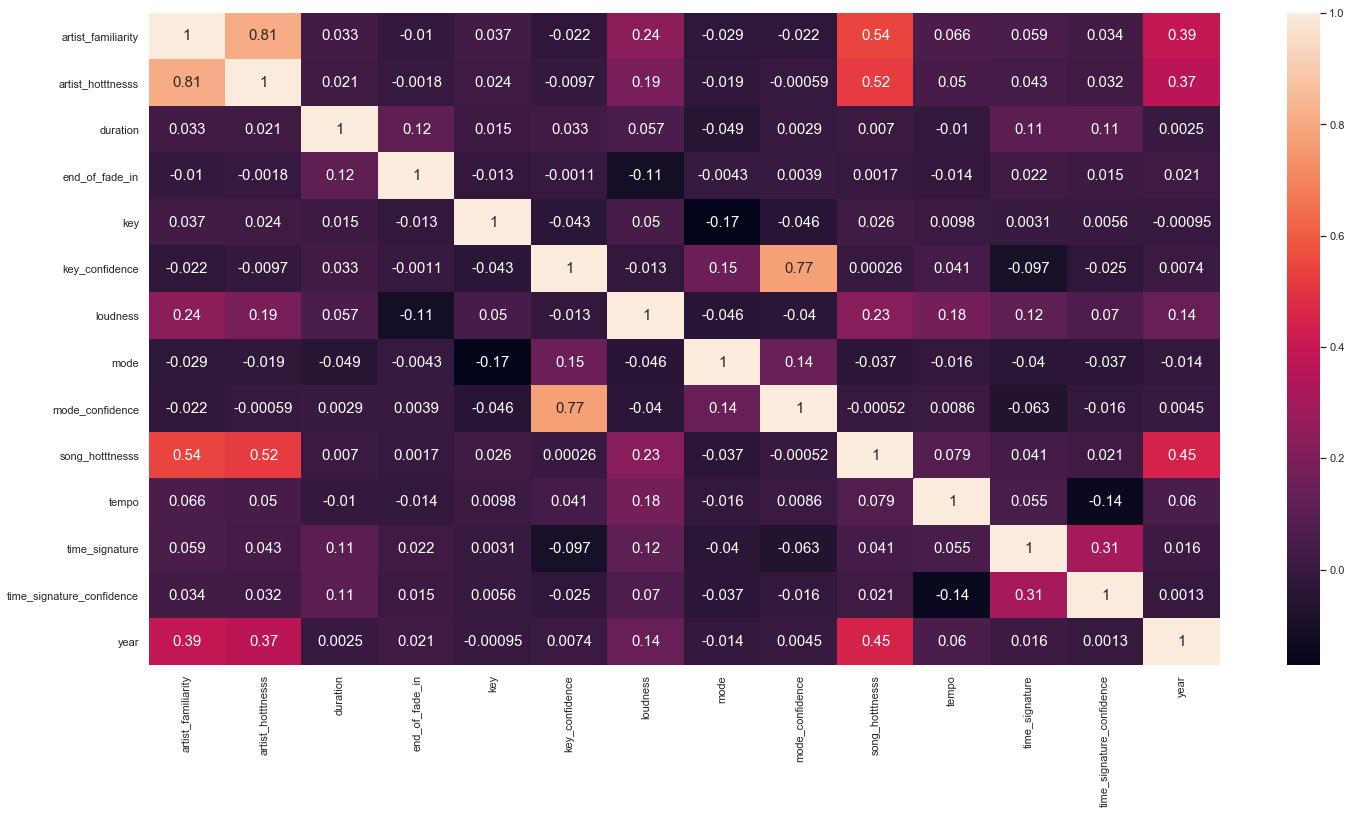

In [37]:
#Heatmap for features
df_plot = df.drop(['danceability','energy','analysis_sample_rate','Unnamed: 0','artist_7digitalid',\
                   'artist_playmeid','release_7digitalid','track_7digitalid','artist_latitude',\
                   'artist_longitude','start_of_fade_out'],axis=1)
corr = df_plot.corr()
sns.set(rc={'figure.figsize':(24,12)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,annot_kws={"size": 15})

In [38]:
#Reading data for plotting popular and unpopular songs across the globe
#Song_hotttnesss threshold kept as 0.4
df = df[np.isnan(df.song_hotttnesss) == False ]
popular = df[df.song_hotttnesss>=0.4]
unpopular = df[df.song_hotttnesss < 0.4]

pop = pd.DataFrame()
unpop = pd.DataFrame()

pop = pop.assign(pop_latitude = popular.artist_latitude)
pop = pop.assign(pop_longitude = popular.artist_longitude)

unpop = unpop.assign(unpop_latitude = unpopular.artist_latitude)
unpop = unpop.assign(unpop_longitude = unpopular.artist_longitude)

#The below csv files are used to plot maps using Google Fusion Tables.
#pop.to_csv('Popular.csv')
#unpop.to_csv('Unpopular.csv')

#### Plot of popular songs across the globe.

In [4]:
#Popular Songs from across the globe 
#The iframe is pasted below. It is a public plot
from IPython.core.display import display, HTML
display(HTML('<iframe width="1050" height="650" scrolling="no" frameborder="no" \
src="https://fusiontables.google.com/embedviz?q=select+col1+from+1pk7hgxEGZpEoMLtlI1gHGJM4VQ3ccMVnYMt9IJyj\
&amp;viz=MAP&amp;h=false&amp;lat=27.97552513167553&amp;lng=-85.5215&amp;t=3&amp;z=2&amp;l=col1&amp;y=3\
&amp;tmplt=4&amp;hml=TWO_COL_LAT_LNG"></iframe>'))

#### Plot of unpopular songs across the globe.

In [5]:
#Unopular Songs from across the globe
from IPython.core.display import display, HTML
display(HTML('<iframe width="1050" height="650" scrolling="no" frameborder="no" \
src="https://fusiontables.google.com/embedviz?q=select+col1+from+1Cng9fxI1VBYNiKTPwM8aBvJhUrI9jZZhM6CBdA\
L_&amp;viz=MAP&amp;h=false&amp;lat=37.423&amp;lng=-122.084&amp;t=3&amp;z=2&amp;l\
=col1&amp;y=2&amp;tmplt=3&amp;hml=TWO_COL_LAT_LNG"></iframe>'))

We see that the spread is almost the same for both popular and unpopular songs. 

#### Plot of artist hotttnesss (popularity metric) vs familiarity

In [6]:
#artist_hotness vs familiarity
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

# Create a trace
temp = df[df['artist_hotttnesss'] != 0]
trace = go.Scatter(
    x = temp['artist_hotttnesss'],
    y = temp['artist_familiarity'],
    mode = 'markers',
)
layout = go.Layout(
    xaxis = dict(title = 'Artist Hotttnesss'),
    yaxis = dict(title = 'Artist Familiarity')
)

data = [trace]

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Artist_hotttnesss vs familiarity')

In [8]:
#Finding out correlation coefficient.
print("The Pearson's Coefficient ")
print(temp['artist_hotttnesss'].corr(temp['artist_familiarity']))

The Pearson's Coefficient 
0.8145026809811377


We see that the relationship is linear upto a certain point and then starts to curve out.<br>
This is reasonable as the linear relationship wouldn't hold at higher ends of the spectrum.<br>
The point being, the relationship is very strong and slightly non-linear in nature. Hence we<br>
still manage to get a high correlation score.

### Location of origin of popular songs

In [3]:
#Artist location vs song_hotttnesss
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

#Latitude vs song_hotttnesss
# Create a trace
trace1 = go.Scatter(
    x = df['artist_latitude'],
    y = df['song_hotttnesss'],
    mode = 'markers',
    showlegend=False,
    marker = dict(size = 3)
)


#Longitude vs song_hotttnesss
# Create a trace
trace2 = go.Scatter(
    x = df['artist_longitude'],
    y = df['song_hotttnesss'],
    mode = 'markers',
    showlegend=False,
    marker = dict(size = 3)
)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Latitude vs song_hotttnesss',\
                                                         'Longitude vs song_hotttnesss'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout']['xaxis1'].update(title='Artist Latitude')
fig['layout']['xaxis2'].update(title='Artist Longitude')
fig['layout']['yaxis1'].update(title='Song_hotttness')
fig['layout']['yaxis2'].update(title='Song_hotttness')

fig['layout'].update(height=800, width=1000, title='Artist Location vs song_hotttnesss')
py.iplot(fig, filename='Artist Location vs song_hotttnesss')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



We see that the eastern parts of the globe produce more popular songs.

#### Plots to see how the feature importance has changed over the years.

In [8]:
#Key features.
def FeatureExtraction(train):
    drop_list = ['artist_location', 'artist_latitude', 'artist_longitude',\
                 'artist_name', 'release', 'title' ,'song_hotttnesss']
    train = train.drop(drop_list, axis=1)

    #Encode artist id into quantitative.
    le = preprocessing.LabelEncoder()
    train['artist_id'] = le.fit_transform(train['artist_id'].astype('str'))

    #Imputation.
    train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())

    #Extracting data.
    Y = copy.deepcopy(train.bbhot)
    Y.shape
    train = train.drop("bbhot", axis=1)

    mode_final = []
    for i, row in train.iterrows():
        #print(i)
        #print(train['mode_confidence'][i])
        if train['mode'][i] == 1:
            mode_final.append(train['mode_confidence'][i])
        else:
            mode_final.append(-train['mode_confidence'][i])
        #print(mode_final[i])
    train = train.drop('mode_confidence', axis=1)
    train = train.drop('mode', axis=1)

    #print(train.shape, Y.shape)
    train['mode'] = mode_final

    #Function to evaluate my model with Cross validation
    from sklearn.model_selection import cross_val_score
    def testingModel(model, X_train, Y_train):
        scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
        print("\nScores:\n", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())
        print()

    X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=7)
    model = XGBClassifier(
     learning_rate =0.1,
     n_estimators=100,
     max_depth=5,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
    model.fit(X_train, y_train)
    testingModel(model, train, Y)
    # make predictions for test data
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print()

    feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

In [9]:
#Features over time.

#Using preprocessed data.
df = pd.read_csv("../Data/MSD_BB.csv")

#Time Slices.
split1 = df[df['year'] >= 1920]
split1 = split1[split1['year'] < 1970]

split2 = df[df['year'] >= 1970]
split2 = split2[split2['year'] < 2000]

split3 = df[df['year'] >= 2000]

Phase 1.


Scores:
 [0.55128205 0.48717949 0.64102564 0.62820513 0.5        0.58974359
 0.69444444 0.28333333 0.66666667 0.66666667]
Mean: 0.5708547008547009
Standard Deviation: 0.11716555304386402

Accuracy: 62.30%

loudness                     78
mode                         78
duration                     61
year                         56
artist_hotttnesss            55
tempo                        54
artist_familiarity           53
end_of_fade_in               47
time_signature_confidence    44
key_confidence               40
artist_id                    37
key                          36
start_of_fade_out            21
time_signature                7
dtype: int64


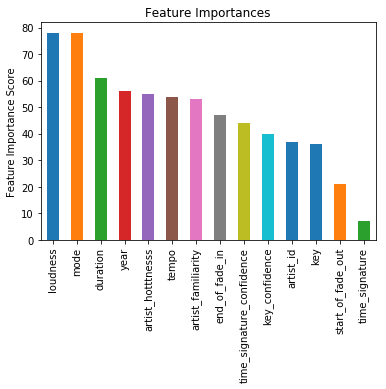

In [30]:
#Period one.
FeatureExtraction(split1)

Phase 2.


Scores:
 [0.65489288 0.53901274 0.62838376 0.66958599 0.63515127 0.64868631
 0.63535032 0.59096338 0.66759554 0.56390224]
Mean: 0.6233524420775616
Standard Deviation: 0.04211488470476411

Accuracy: 80.29%

loudness                     182
tempo                        181
artist_id                    179
artist_familiarity           173
mode                         154
key_confidence               148
end_of_fade_in               144
duration                     135
artist_hotttnesss            123
year                         114
start_of_fade_out            106
time_signature_confidence     93
key                           78
time_signature                21
dtype: int64


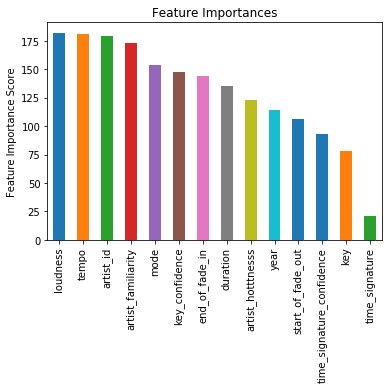

In [31]:
#Period two.
FeatureExtraction(split2)

Phase 3.


Scores:
 [0.52010114 0.71125158 0.64525917 0.6897598  0.62541087 0.65903919
 0.59102402 0.68495575 0.59266007 0.61868818]
Mean: 0.6338149773183609
Standard Deviation: 0.05409615328986948

Accuracy: 86.64%

artist_hotttnesss            197
tempo                        180
mode                         157
artist_familiarity           152
loudness                     151
artist_id                    151
key_confidence               149
duration                     116
end_of_fade_in               114
start_of_fade_out            100
time_signature_confidence     85
year                          77
key                           61
time_signature                24
dtype: int64


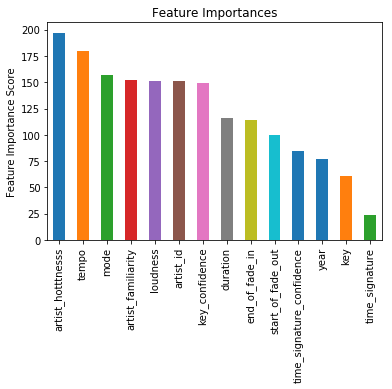

In [32]:
#Period three.
FeatureExtraction(split3)

#### Feature representation plots for popular and unpopular songs

In [32]:
#Feature representation.
data = pd.read_csv("../Data/MSD_BB.csv")

#Encode artist id into quantitative
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))

#Graph distribution of an attribute of songs that are hot.
def freq1(col):
   g = sns.kdeplot(data[col][(data["bbhot"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["Popular"])
   plt.show()

#Graph distribution of an attribute of songs that are not hot.
def freq2(col):
   g = sns.kdeplot(data[col][(data["bbhot"] == 0)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["Non-Popular"])
   plt.show()

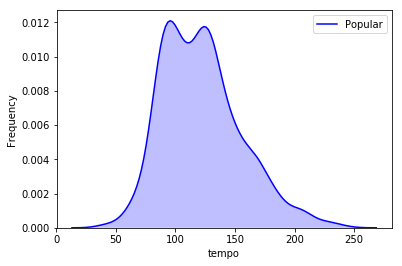

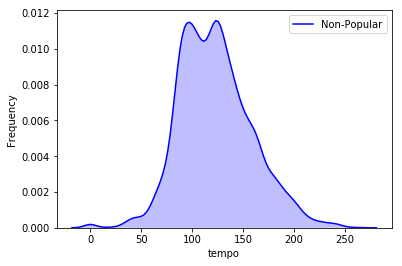

In [33]:
#Tempo.
freq1("tempo")
freq2("tempo")

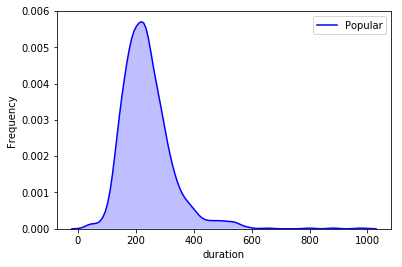

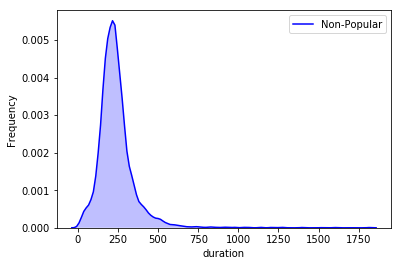

In [34]:
#Duration.
freq1("duration")
freq2("duration")

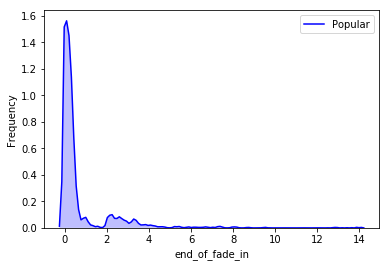

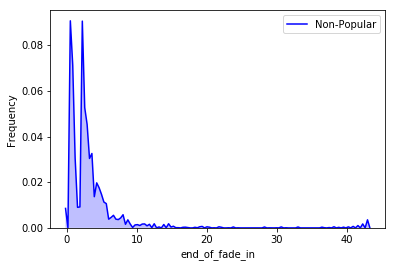

In [35]:
#end_of_fade_in.
freq1("end_of_fade_in")
freq2("end_of_fade_in")

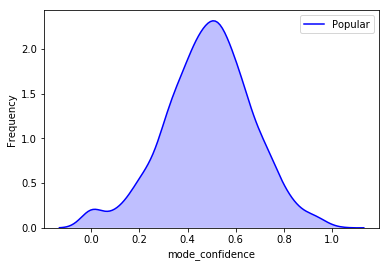

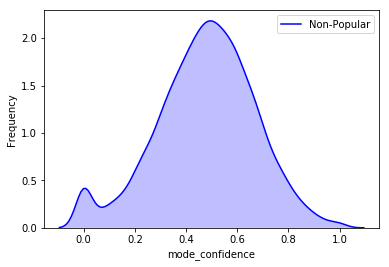

In [36]:
#mode_confidence
freq1("mode_confidence")
freq2("mode_confidence")

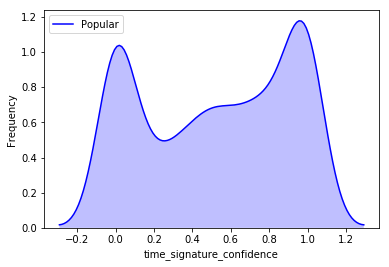

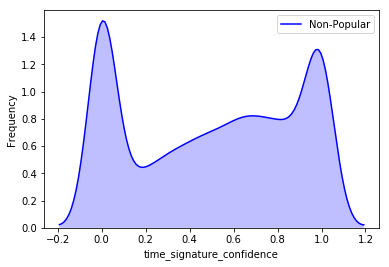

In [37]:
#time_signature_confidence
freq1("time_signature_confidence")
freq2("time_signature_confidence")